In [1]:
import pandas as pd
import struct as st
import numpy as np

In [2]:
import numpy as np
import struct

with open('datasets/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, (nrows *ncols)))
    data = data[8:]

In [3]:

data_reshaped = data.reshape(9992, 28,28)

In [4]:
import matplotlib.pyplot as plt

plt.imshow(data_reshaped[452,:,:], cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
with open('datasets/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, (nrows*ncols)))
    train_data = train_data[8:]

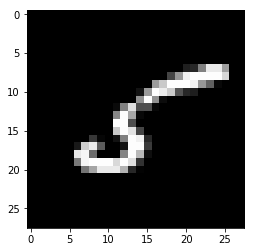

In [6]:
training_data_reshaped = train_data.reshape(59992, 28, 28)
plt.imshow(training_data_reshaped[3,:,:], cmap='gray')
plt.show()

In [7]:
with open('datasets/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_label = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    

In [8]:
with open('datasets/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data_label = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [9]:
train_label[3]

5

In [10]:
some_digit= data[452]
data_label[452]

5

In [11]:
X_train, y_train = train_data, train_label
some_trained_digit = X_train[452]
y_train[452]

9

In [12]:
X_test, y_test = data, data_label
X_train.shape

(59992, 784)

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

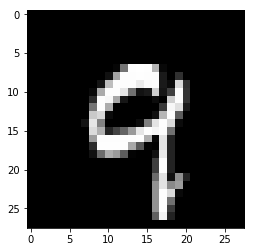

In [14]:
training_data_reshaped = train_data.reshape(59992, 28, 28)
plt.imshow(training_data_reshaped[452,:,:], cmap='gray')
plt.show()

In [15]:
def move_pick(way, dataset):
    direction = way.upper()
    dataset_size = list(dataset.shape)
    if(direction == "UP"):
        np.delete(dataset, 0, 0)
        dataset.append(np.zeros(dataset_size[1]))
    elif(direction == "DOWN"):
        np.delete(dataset, (dataset_size[0]-1), 0)
        z = np.zeros(784)
        dataset =np.concatenate(([z], X_train), axis = 0)
        print(dataset.shape)
    elif(direction == "LEFT"):
        np.delete(dataset, 0, 1)
        np.column_stack((zeros(shape(a)[0]), dataset))
    elif(direction == "RIGHT"):
        np.delete(dataset, dataset_size[1]-1 , 1)
        np.column_stack((dataset, zeros(shape(dataset)[0])))
    #training_data_reshaped = dataset.reshape(dataset_size[0], 28, 28)
    #plt.imshow(training_data_reshaped, cmap='gray')
    #plt.show()

In [16]:
move_pick("Down", X_train[452])

(59993, 784)


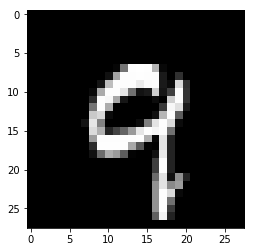

In [17]:
training_data_reshaped = X_train.reshape(59992, 28, 28)
plt.imshow(training_data_reshaped[452,:,:], cmap='gray')
plt.show()

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([False])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

Occasion you will need more control over the cross validation process than what Scikit learn provides
The following code does roughly the same thing as Scikit Learns cross_val_score() function and prints the same results

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9583458345834583


c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.954945494549455


c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9521404280856172


Now Lets use cross_val_score()

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring = "accuracy")

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([0.95834583, 0.95494549, 0.95214043])

 Okay Don't get excited with these results. Here is the results of a dumb classifier

In [22]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring= "accuracy")

array([0.91124112, 0.90858629, 0.90913637])

So what did this do. It returned false every time. Well only 10 % of the numbers were 5 so it is accurate 90% of the time.
This demonstrates why accuracy is generally not the preferred preformance measure for classifiers, especially when you are dealing with skewed datasets(i.e.), when some classes are much more frequent than others.

### Confusion Matrix

The general idea is to count the number of times instances of class A are classified as class B. 
In this example the image 5 being confused with the image of 3. To know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and the 3rd column of the confusion matrix

To compute the confusion matrix you first need to have a set of predictions, so they can be compared to the actual targets.

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv= 3)

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53733,   839],
       [ 1852,  3568]], dtype=int64)

Okay first row deals with non-5 or the negative class. The first columns are called the true negatives and the second column is the false positives

The second row is the positive class. the first column shows the false negatives, while the second colmns shows the true positives.


A perfect classifier would have only true poistives and true negatives leaving it to look like an identity matrix

### Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8096210574086681

In [27]:
recall_score(y_train_5, y_train_pred)#it only detects 5's 65% of the time

0.6583025830258302

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7261626132085072

In some contexts you mostly care about precision and in other contexts you really care about recall
for example if you trained a classifier to detect videos that are safe for kids you would probably prefer a classifier that rejectss many good videos(low recall) but keeps only safe ones(high precision), rather than a clasifier that has a much higher recall but lets a few really bad videos show up in your product

### Precision/RecallTradeoff

High Precision means you get less false positives but if the recall is low than that means you got lots of false negatives. In other words you missed a bunch of 5's. So graphing these togethers helps you find you prefect balance

The code below will return the threshold that the algorithm is using. By raising the threshold you increase its precision but the algorithms won't let you just set this threshold.If any question refer to page 90 in the book

In [29]:
#y_scores are the score that is checked against the algorithm
# and the decision function returns that score for each instance
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                            method = "decision_function")
## Now with these scores you cancompute precision and recall for all poosible
# thresholds using the precision_recall_curve()

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

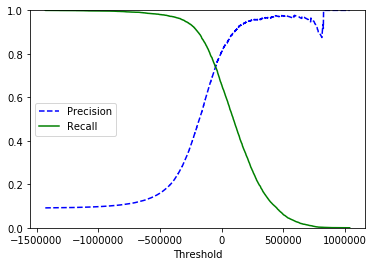

In [31]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 6)
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()   

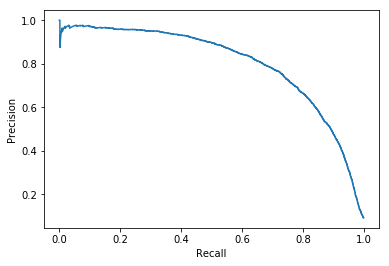

In [32]:

plt.plot(recalls,precisions)
plt.ylabel("Precision")
plt.xlabel ("Recall")
plt.show()

Okay this lets decide a new threshold value. Looking at the first plot we can see
that the precision is about 90% when the threshold is at about 100000, but the recall is going to go down lets see

In [33]:
y_train_pred_90 = (y_scores> 100000)
precision_score(y_train_5, y_train_pred_90)

0.9001349527665317

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.4922509225092251

This means we are accurate 90% of the time but miss over half of them. :(

### The ROC Curve

Receiver operating characteristic curve plots the true positive rate(antother name for recall) against the false positive rate. 
The FPR is the ratio of negative instances that are incorrectly classified as positive.It is equal to one minus the true negative rate.

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [36]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    

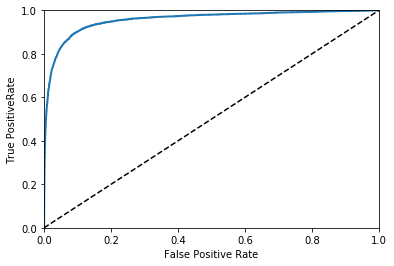

In [37]:
plot_roc_curve(fpr,tpr)
plt.show()

One way to compare classifiers is to measure the area under the curve(AUC),A perfect classifier will have a ROC AUC equal to 1,
whereas a purely random classifier will have a ROC AUC equal to .5 Wcikit -Learn provides a function to compare the ROC AUC

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_train_5, y_scores)

0.9569534124389106

#### Using the ROC AUC on other algorithms

We retrieved the y_scores for SGDClassifier using the decision_function() but not all algorithms have that method. Instead use
predict_proba() method. It returns an array containing a row per instance and a column per class, each containing the probability
that the given instancesbelongs to the given class(e.g. 70% chance that the image represents a 5);

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method = "predict_proba")

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


To plot the ROC curve, you need scores, not probabilities. A simple solutions is to use the positive class's probability as the score

In [41]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

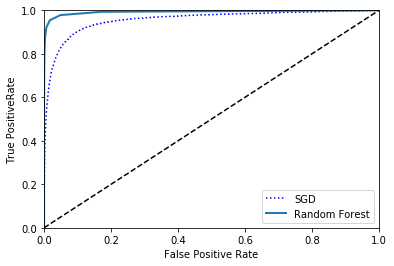

In [42]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.992762533764933

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [45]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3)

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
precision_score(y_train_5, y_train_pred_forest)

0.9840213049267643

In [47]:
recall_score(y_train_5, y_train_pred_forest)

0.8180811808118081

In [48]:
f1_score(y_train_5, y_train_pred_forest)

0.8934112431996776

## Multiclass Classification

Some algorithms (such as Random Forest classifier or naive Bayes classifier) are capable of handling multiple classes directly. 
Others are stricily binary classifiers. However there are stategies that you can use to perform multiclass classification using 
multiple binary classifiers

### OvA One versus all

A binary classifiers trains multiple classifiers and runs them all. In the case of 10 digits it would train 10 binary classifiers
then you would get the decision score from each classifier for that image and you would select the class whose classifier outputs the highest score 

### OvO One versus One

With this strategy you train a classifier for every pair of digits. If there are N classes, you need to train N * (N-1) /2 
classifiers, (this digit problem that would be 45 classifiers) and see wins the most duels. The main advantage to this approach
is that the classifier only has to be trained on parts of the training set. This works best for algorithms that work better on small
training sets. Most binary algorithms, however, prefer OvA

Scikit-Learn detects when you try to use a binary classification alorithm for a multiclass classification task and it automatically runs OvA(except for SVM classifiers which use OvO)

In [49]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_trained_digit])

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([9], dtype=uint8)

In [50]:
some_digit_scores = sgd_clf.decision_function([some_trained_digit])
some_digit_scores # as you can see the score for 9 was the highest

array([[-496407.88598779, -438520.61500842, -261513.79934353,
        -558662.79503773, -279510.88494216, -485461.94030143,
        -336430.33520384, -111224.91697637, -114904.98741929,
         235920.65919751]])

You can force ScikitLearn to use one-versus-one or one-versus all, just use the OneVsOneCalssifier or  the OneVsRestClassifier

In [51]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf =  OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_trained_digit])

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([9], dtype=uint8)

In [52]:
len(ovo_clf.estimators_)

45

In [53]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_trained_digit])

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([9], dtype=uint8)

In [54]:
forest_clf.predict_proba([some_trained_digit])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Evaluating these classifiers

In [55]:
cross_val_score(sgd_clf, X_train, y_train, cv= 3, scoring = "accuracy")

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([0.85510724, 0.87628763, 0.84844696])

Not bad but don't forget you can scale the training features for a better classifier

## Error Analysis


Commom error analysis starts with exploting data preparation options, trying out multiple modes, shortlisting the best ones and fine-tuning their hyperparammeters using GridSearchCV, and automating as much as possible. After having found a promising model here are some ways to improve it.

In [56]:
# look at your confusiont_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)


c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [57]:
conf_mx

array([[5470,    1,   23,   17,   17,   82,  237,    9,   53,   13],
       [   1, 6456,   41,   28,   16,   46,   37,   14,   55,   46],
       [  53,   62, 5022,  101,   61,   68,  257,   83,  221,   29],
       [  35,   24,  160, 5014,   20,  449,   75,   66,  122,  165],
       [  22,   19,   33,    9, 4951,   45,  111,   40,  259,  352],
       [  79,   18,   45,  174,   66, 4403,  230,   21,  286,   98],
       [  42,   20,   32,    4,   31,  100, 5636,    3,   47,    3],
       [  27,   13,   64,   35,   92,   87,   12, 5468,   53,  414],
       [  55,  150,  167,  153,  123,  505,  148,   64, 4210,  276],
       [  39,   15,   22,   51,  229,  175,   11,  223,  223, 4960]],
      dtype=int64)

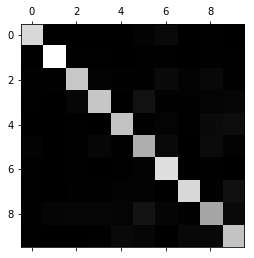

In [58]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\beboo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([[5714,    2,   28,   12,   12,   53,   49,    9,   40,    3],
       [   1, 6485,   44,   30,    6,   41,    8,   11,  103,   11],
       [  60,   41, 5304,  112,   80,   26,   97,   61,  158,   18],
       [  48,   40,  143, 5354,    3,  223,   36,   59,  127,   97],
       [  22,   24,   41,    9, 5329,   10,   55,   36,   89,  226],
       [  77,   39,   41,  199,   78, 4600,  108,   25,  159,   94],
       [  30,   27,   43,    2,   44,   91, 5635,    3,   43,    0],
       [  24,   25,   70,   31,   58,   13,    5, 5793,   16,  230],
       [  55,  166,   73,  175,   14,  156,   52,   28, 4989,  143],
       [  44,   33,   26,   91,  155,   33,    3,  218,   81, 5264]],
      dtype=int64)

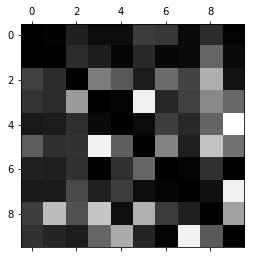

In [61]:
# lets use the scaled version but lets add up all the rows then divide each row by that sum this will allow us 
#to see the errors better. After that we will fill the diagonal with 0
# The highest numbers will be white
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap= plt.cm.gray)
plt.show()
# this show that 3 and 5 are commonly confused the symmetry signals confusion between the two
# shows that 4 is confused with 9 and that 7 is confused with 9 also 9 is confused with seven

Okay know we want to look at the data to see the images. We will show just the images that are nine and sevens

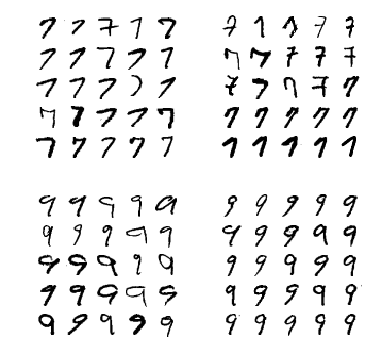

In [62]:
class_7, class_9 = 7, 9
X_77 = X_train[(y_train== class_7) & (y_train_pred == class_7)]
X_79 = X_train[(y_train== class_7) & (y_train_pred == class_9)]
X_99 = X_train[(y_train== class_9) & (y_train_pred == class_9)]
X_97 = X_train[(y_train== class_9) & (y_train_pred == class_7)]
plt.figure(figsize = (6,6))
# from the books jupyter section
# EXTRA
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.subplot(221); plot_digits(X_77[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_79[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_97[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_99[:25], images_per_row = 5)
plt.show()
#first column shows numbers that were predicted to be 7's and second column are predicted to be 9's

Notice that the nines that were confused with sevens have more of an angle at the bottom stick and the sevens confused with nines have a straight down stick. 

## Multilabel Classification

In [63]:
#Train an algorithm on more than one label is possible
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)# returns an array of true false 
y_train_odd = (y_train %2 == 1)
y_multilabel= np.c_[y_train_large, y_train_odd] # returns an array of shape(59992, 2) 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [64]:
knn_clf.predict([some_trained_digit])# is a 9

array([[ True,  True]])